In [1]:
import numpy as np
import pandas as pd
import missingno as msno
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Data Preprocessing Libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve


# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve


# Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Courses\Datasets\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [5]:
fraud = (len(df[df['Class'] == 1]) / len(df)) * 100
not_fraud = (len(df[df['Class'] == 0]) / len(df)) * 100

print(f'There are {"{:.2f}".format(fraud)}% in dataset')
print(f'There are {"{:.2f}".format(not_fraud)}% in dataset')

There are 0.17% in dataset
There are 99.83% in dataset


Text(0.5, 1.0, 'Class Distributions \n (0:No Fraud & 1:Fraud)')

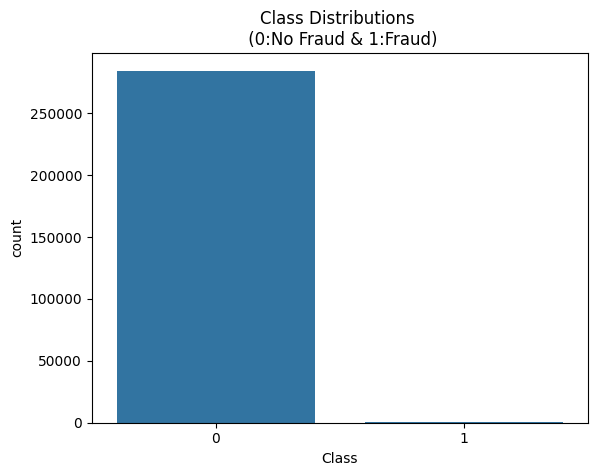

In [6]:
sns.countplot(data=df, x='Class')
plt.title('Class Distributions \n (0:No Fraud & 1:Fraud)')

## Insight: There are heavily Imbalanced in target feature we need to Solve this issue later

In [7]:
df.describe()[['Amount', 'Time']]

,Amount,Time
count,284807.00,284807.00
mean,88.35,94813.86
std,250.12,47488.15
min,0.00,0.00
25%,5.60,54201.50
50%,22.00,84692.00
75%,77.16,139320.50
max,25691.16,172792.00


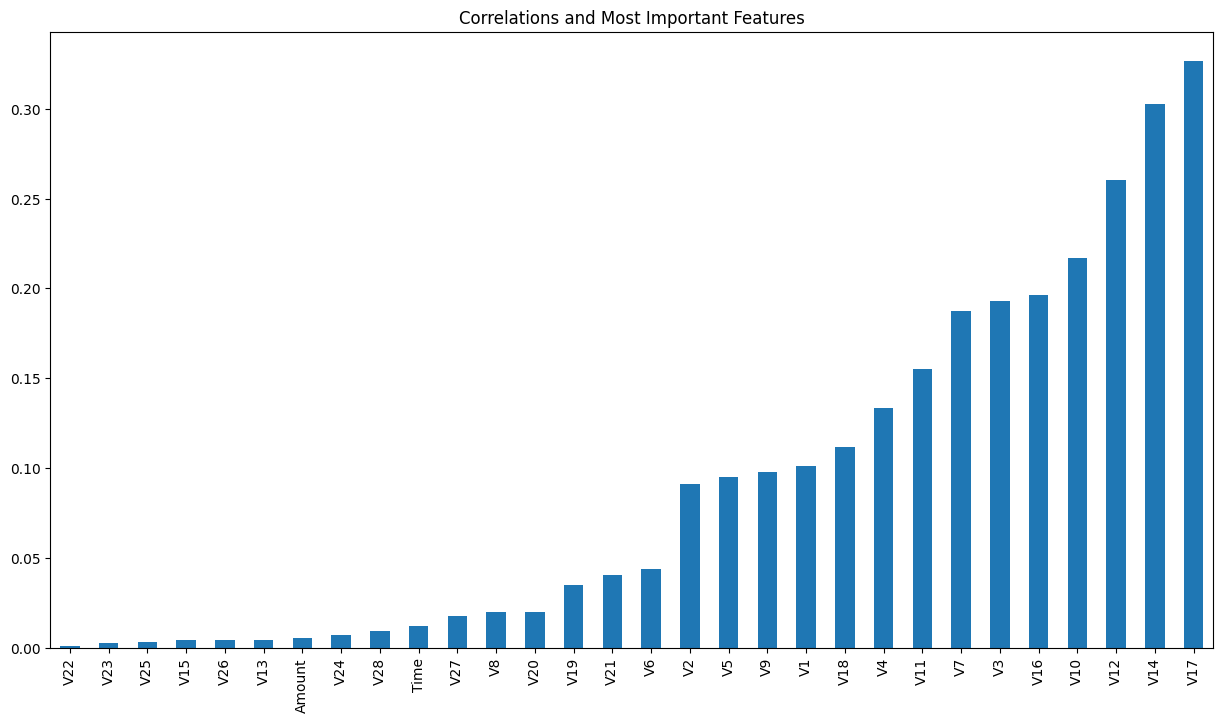

In [8]:
plt.figure(figsize=(15,8))
df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Correlations and Most Important Features')
plt.show()

<Axes: >

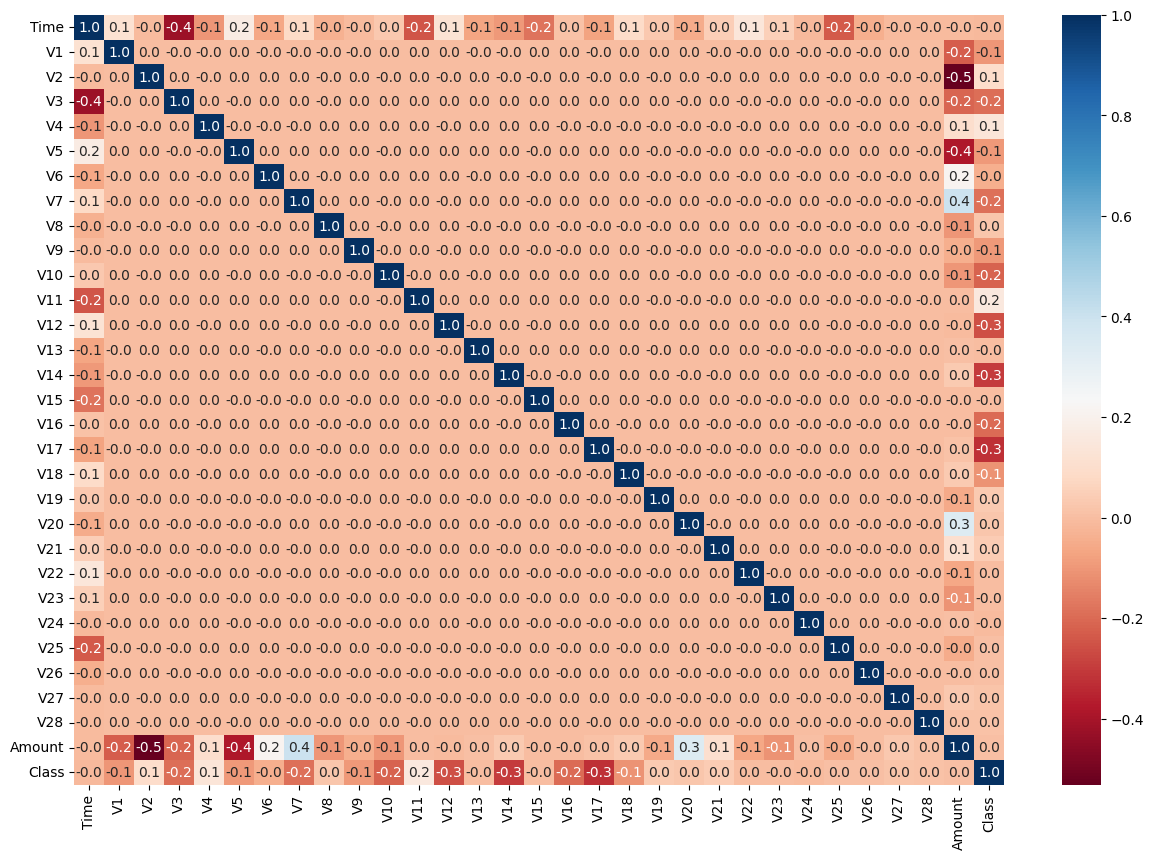

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='RdBu')

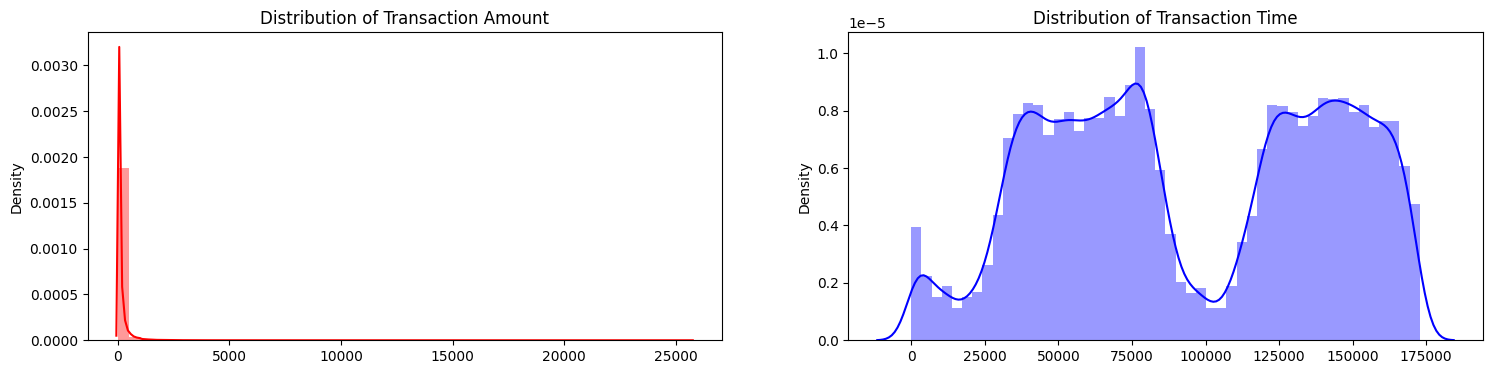

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_values = df['Amount'].values
time_values = df['Time'].values

sns.distplot(amount_values, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(time_values, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time')

plt.show()

## Insight: Fraudulent transactions might stand out if they have unusually high amounts and occur at unusual times when overall activity is low.

In [11]:
fraud = df.query("Class == 1")
not_fraud = df.query("Class == 0")[:492]

balanced_df = pd.concat([fraud, not_fraud]).sample(frac=1, random_state=42)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121,77.00,-0.43,0.75,1.76,-0.17,0.06,-0.21,0.65,0.07,-0.29,...,-0.20,-0.43,0.01,0.16,-0.40,0.05,0.10,-0.12,9.12,0
248296,153875.00,-0.61,3.70,-5.53,5.62,1.65,-2.34,-0.91,0.71,-3.75,...,0.32,-0.47,-0.08,-0.67,-0.64,0.07,0.49,0.29,0.00,1
239,160.00,1.17,0.47,0.01,1.26,0.12,-0.87,0.55,-0.28,-0.47,...,0.07,0.28,-0.10,0.43,0.74,-0.27,0.01,0.02,20.00,0
239501,150139.00,-6.68,-2.71,-5.77,1.45,-0.66,-1.15,0.85,0.43,-1.32,...,0.22,1.19,0.34,0.22,0.80,0.04,-0.05,0.08,237.26,1
143336,85285.00,-6.71,3.92,-9.75,5.15,-5.15,-2.10,-5.94,3.58,-4.68,...,0.95,-0.45,0.13,-0.34,0.39,1.08,1.65,-0.39,252.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,40662.00,-4.45,-0.01,-5.13,6.95,5.27,-4.30,-2.59,0.34,-3.88,...,0.25,-0.05,-0.23,-0.40,0.86,0.66,0.49,0.97,1.00,1
142557,84789.00,-1.43,-0.80,1.12,0.39,-0.28,-0.06,1.33,0.20,-0.55,...,0.33,0.01,0.84,0.11,0.16,-0.62,-0.12,0.04,354.33,1
368,269.00,1.32,-1.17,0.71,-2.18,-1.51,0.06,-1.31,0.30,0.79,...,-0.35,-0.37,0.06,-0.32,0.15,-0.00,0.08,0.01,2.60,0
239499,150138.00,-2.15,2.19,-3.43,0.12,-0.17,0.29,-2.81,-2.68,-0.56,...,-0.07,0.56,-0.08,-0.44,0.35,-0.52,0.14,0.03,50.00,1


Text(0.5, 1.0, 'Class Distributions \n (0:No Fraud & 1:Fraud)')

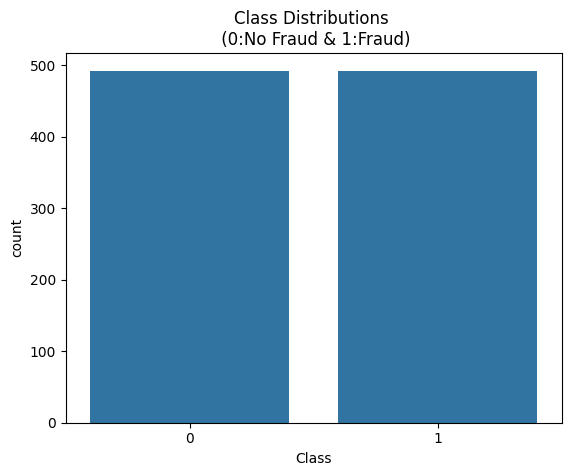

In [12]:
sns.countplot(data=balanced_df, x='Class')
plt.title('Class Distributions \n (0:No Fraud & 1:Fraud)')

## Now we have Balanced Dataframe.
## Lets check Correlation for all Features.

<Axes: >

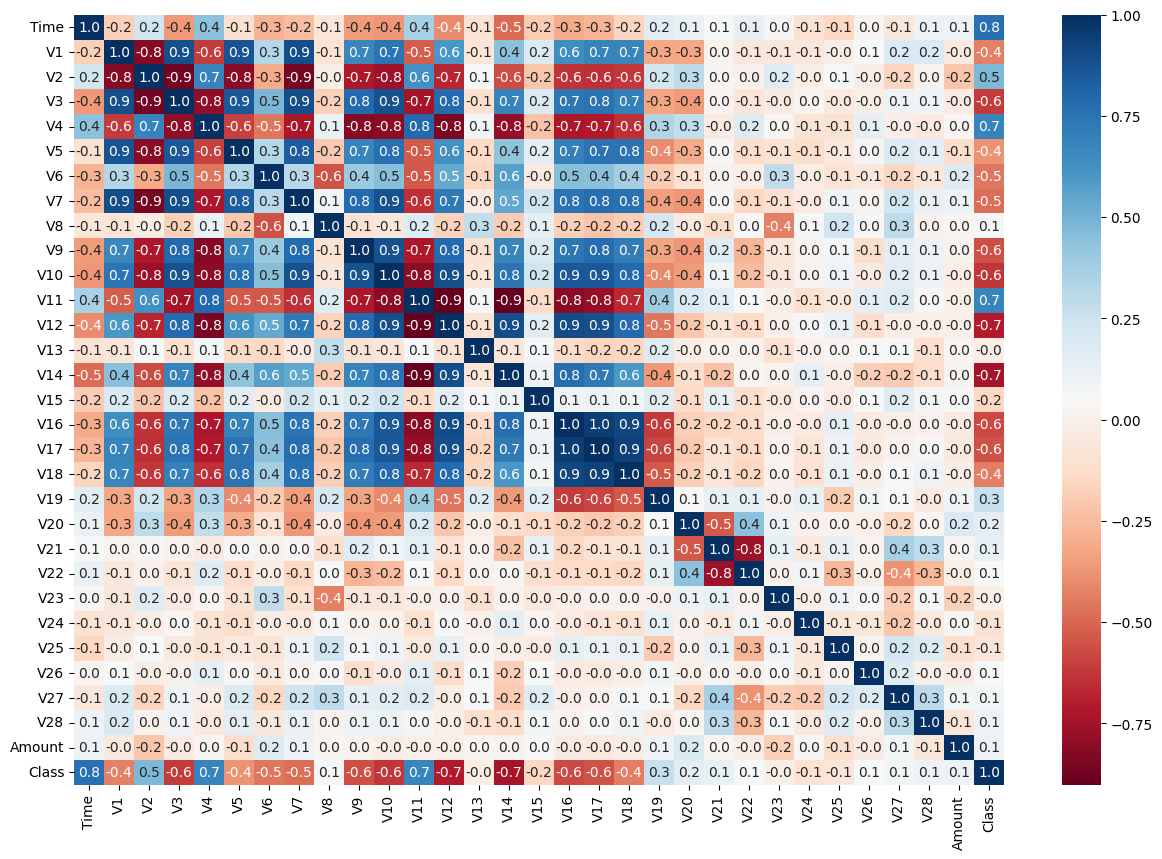

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(balanced_df.corr(), annot=True, fmt='.1f', cmap='RdBu')

## Insigth: V2, V4, V11, and V19 are positively correlated.
## Insigth: V17, V14, V12 and V10 are negatively correlated.

In [14]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

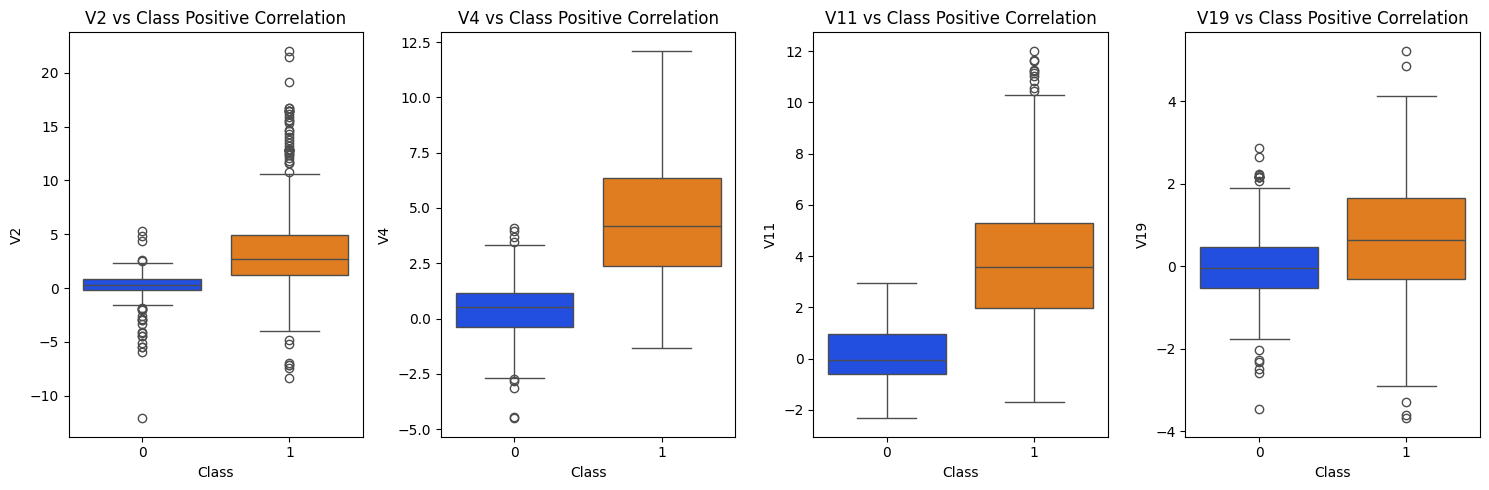

In [15]:
plt.figure(figsize=(15, 5))

features = ['V2', 'V4', 'V11', 'V19']

for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1) 
    sns.boxplot(data=balanced_df, x="Class", y=feature, palette='bright')
    plt.title(f'{feature} vs Class Positive Correlation')

plt.tight_layout()
plt.show()

## The higher these values are, the more likely the end result will be a fraud transaction.

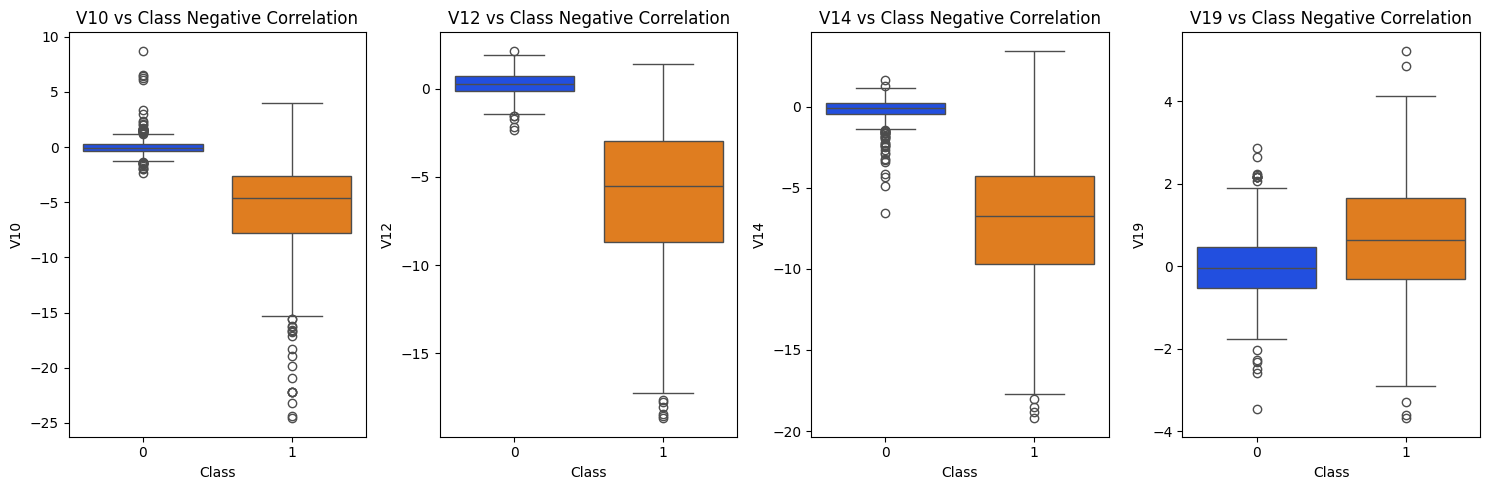

In [16]:
plt.figure(figsize=(15, 5))

features = ['V10', 'V12', 'V14', 'V19']

for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1) 
    sns.boxplot(data=balanced_df, x="Class", y=feature, palette='bright')
    plt.title(f'{feature} vs Class Negative Correlation')

plt.tight_layout()
plt.show()

## The lower these values are, the more likely the end result will be a fraud transaction.

# Data Preprocessing

## Handle Missing data

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

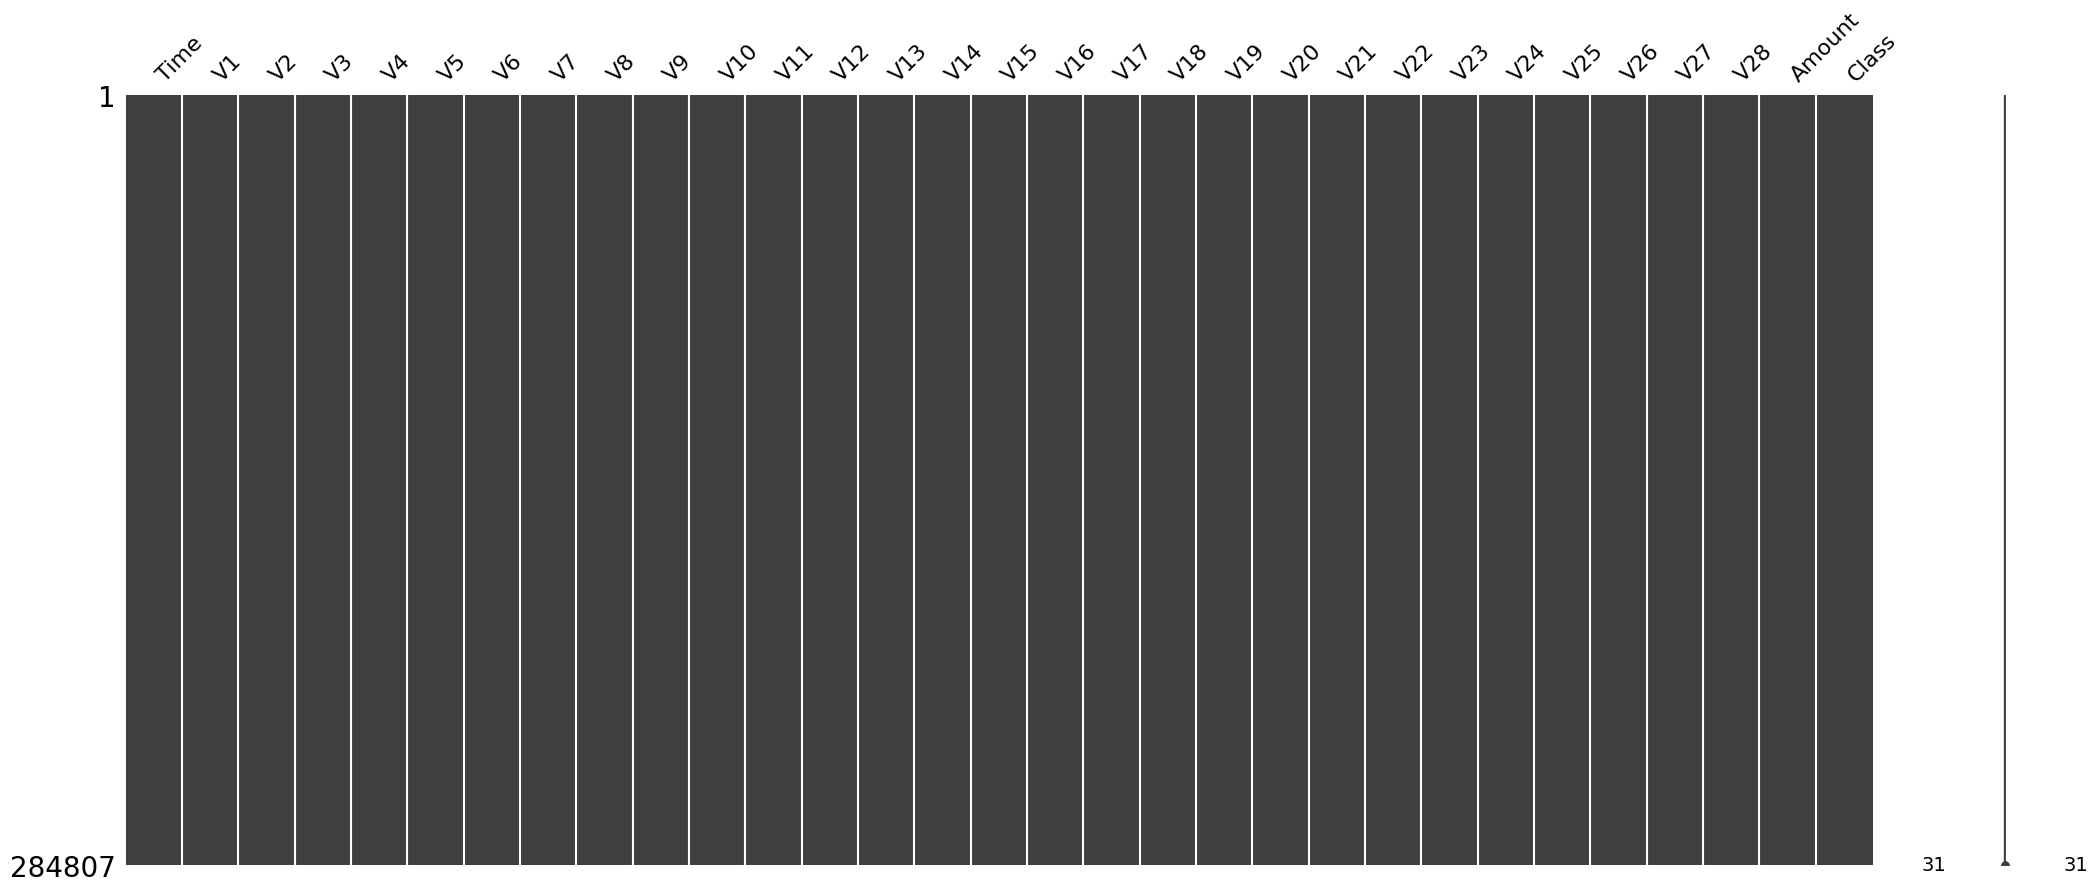

In [18]:
msno.matrix(df)

## There is no Missing values in Dataframe

## Handle Outliers

In [19]:
outliers_indices = detect_outliers(df, 0, df.columns)

print(f'Length of Data: {len(df)}')
print(f'Length of Outliers: {len(outliers_indices)}')
print(f'Outliers = {(len(outliers_indices)* 100 / (len(df)))} % of data')

Length of Data: 284807
Length of Outliers: 138488
Outliers = 48.62520935229822 % of data


## Split data to Train and Test Sets

In [20]:
x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=False)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(256326, 30)
(28481, 30)
(256326,)
(28481,)


In [21]:
print(y_train.value_counts())

Class
0    255856
1       470
Name: count, dtype: int64


## Apply Methods to handle Imbalanced classes

### Oversampling Minority Class

In [22]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print(y_train.value_counts())

### Undersampling Majority class

In [23]:
# rus = RandomUnderSampler(random_state=42)
# x_train, y_train = rus.fit_resample(x_train, y_train)
# print(y_train.value_counts())

### Combination of over and under Sampling

In [24]:
# over = SMOTE(sampling_strategy=0.1, random_state=42)  
# under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# x_train, y_train = over.fit_resample(x_train, y_train)
# x_resampled, y_resampled = under.fit_resample(x_train, y_train)

# print(y_train.value_counts())

In [25]:
smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train)
print(y_train.value_counts())

Class
0    255384
1    255384
Name: count, dtype: int64


## Feature Scaling

In [26]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Modeling

## Machine Learning

In [27]:
# Let's implement simple Models
models = {
    'LogisticRegression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(n_jobs=-1),
    'XGB':XGBClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'LightGBM':LGBMClassifier()
}

Model: LogisticRegression
------------------
CV Scores: [0.97240441 0.98146915 0.98146915 0.97998101 0.98061731]
Train Accuracy: 0.9821406196159509
Test Accuracy: 0.9957866647940733
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28459
           1       0.12      0.73      0.21        22

    accuracy                           1.00     28481
   macro avg       0.56      0.86      0.60     28481
weighted avg       1.00      1.00      1.00     28481



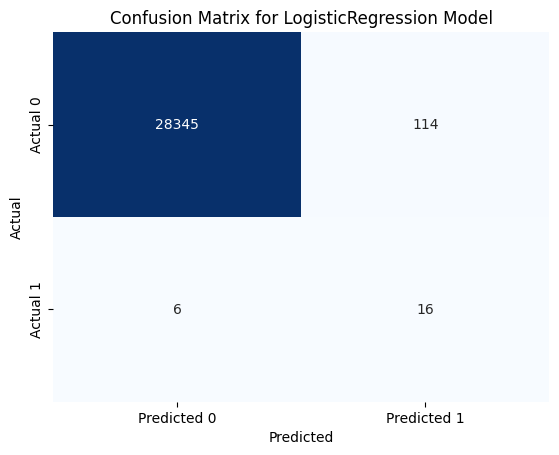

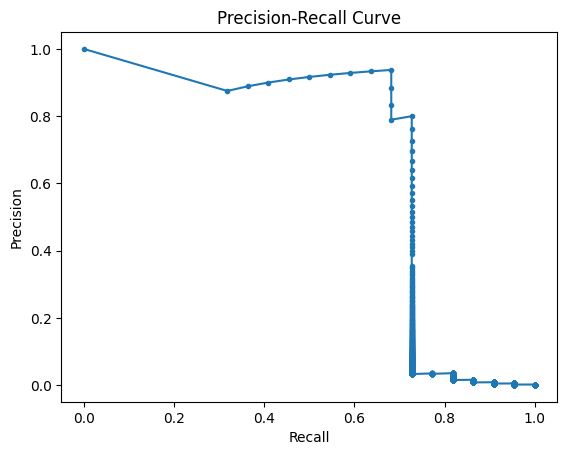

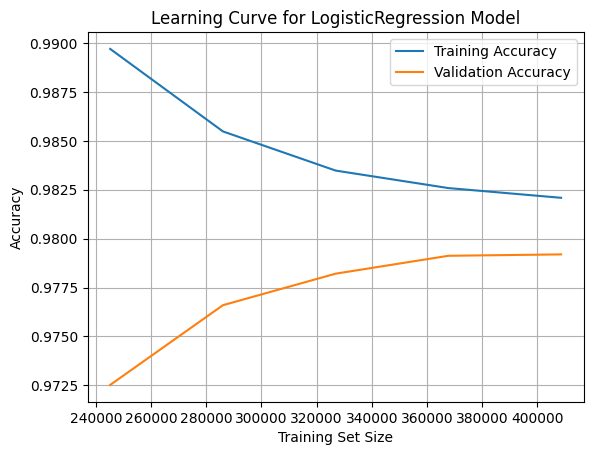



Model: Decision Tree
-------------
CV Scores: [0.50583433 0.98256554 0.96728469 0.99785616 0.5509383 ]
Train Accuracy: 1.0
Test Accuracy: 0.9957164425406412
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28459
           1       0.12      0.68      0.20        22

    accuracy                           1.00     28481
   macro avg       0.56      0.84      0.60     28481
weighted avg       1.00      1.00      1.00     28481



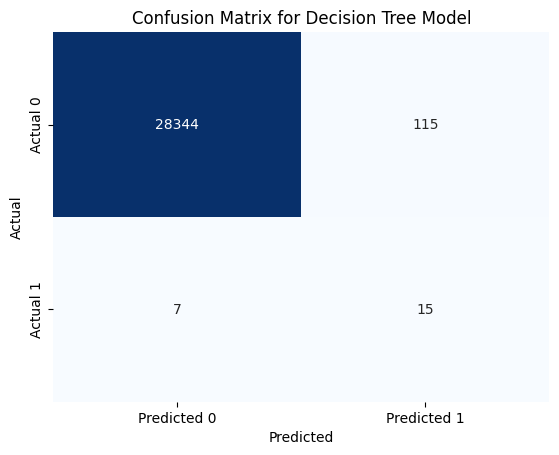

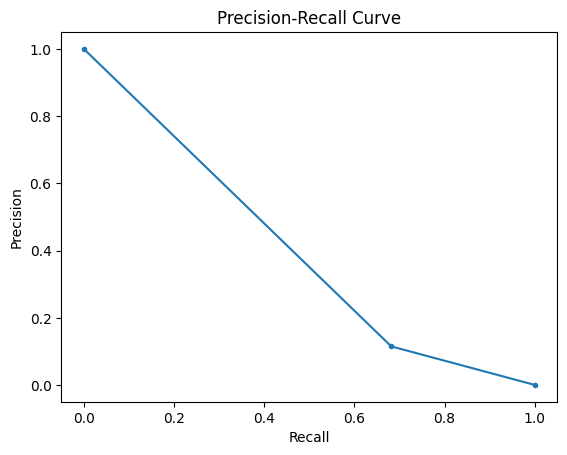

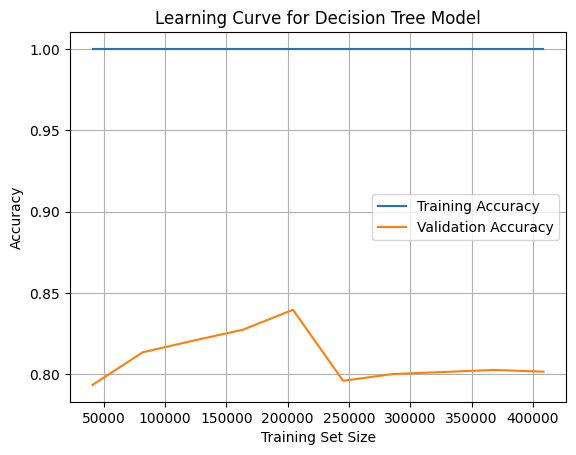



Model: Random Forest
-------------
CV Scores: [0.65491317 0.99989232 0.99987274 0.99977485 0.58937085]
Train Accuracy: 1.0
Test Accuracy: 0.9995786664794073
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28459
           1       0.73      0.73      0.73        22

    accuracy                           1.00     28481
   macro avg       0.86      0.86      0.86     28481
weighted avg       1.00      1.00      1.00     28481



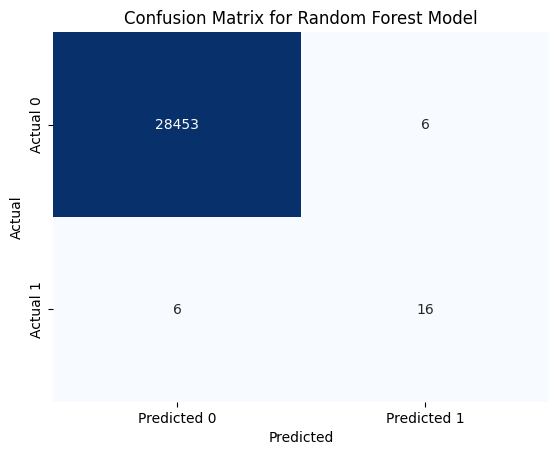

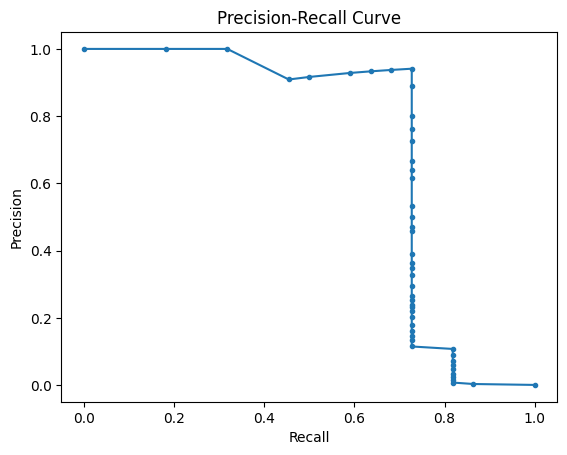

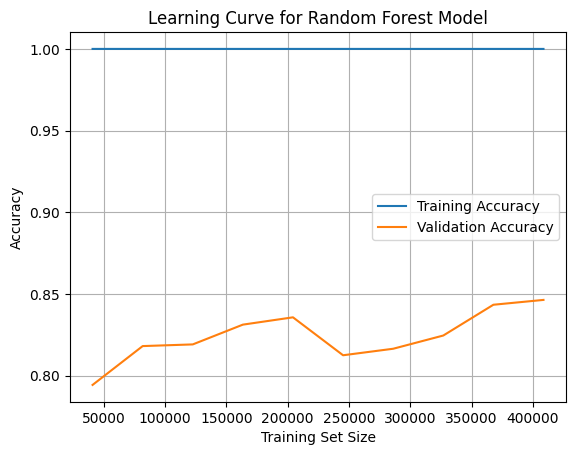



Model: XGB
---
CV Scores: [0.93803473 0.95875835 0.99710241 0.99853161 0.64406332]
Train Accuracy: 1.0
Test Accuracy: 0.9991222218320986
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28459
           1       0.46      0.73      0.56        22

    accuracy                           1.00     28481
   macro avg       0.73      0.86      0.78     28481
weighted avg       1.00      1.00      1.00     28481



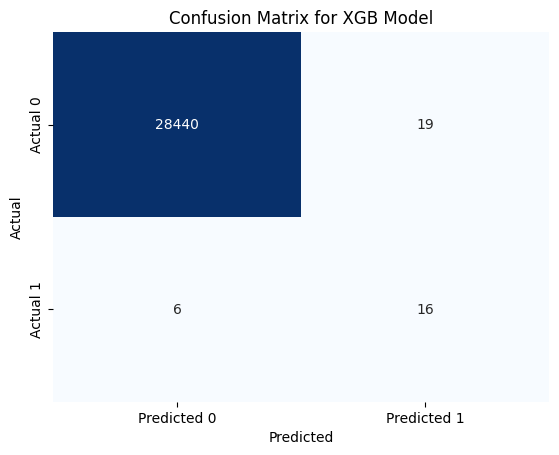

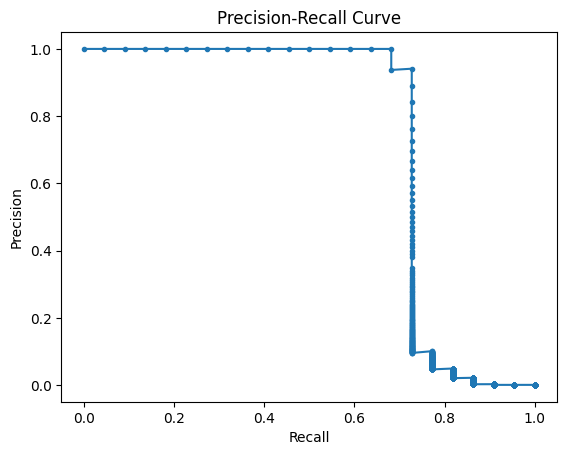

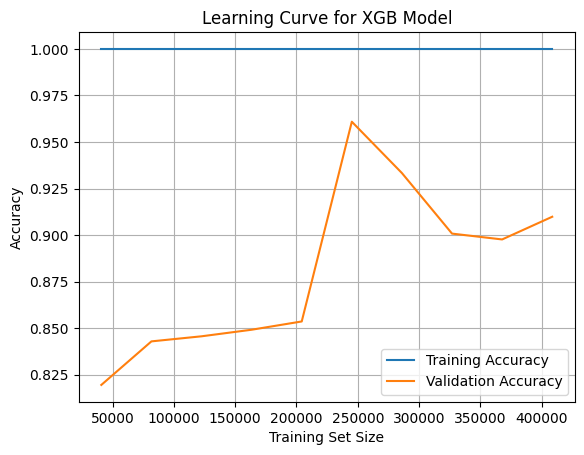



Model: Gradient Boost
--------------
CV Scores: [0.63098851 0.96757836 0.9850324  0.98636359 0.59058471]
Train Accuracy: 0.9892279860915327
Test Accuracy: 0.9931884414170851
classification_report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28459
           1       0.08      0.73      0.14        22

    accuracy                           0.99     28481
   macro avg       0.54      0.86      0.57     28481
weighted avg       1.00      0.99      1.00     28481



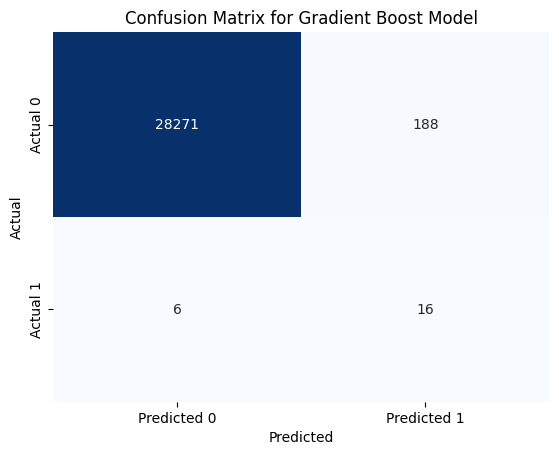

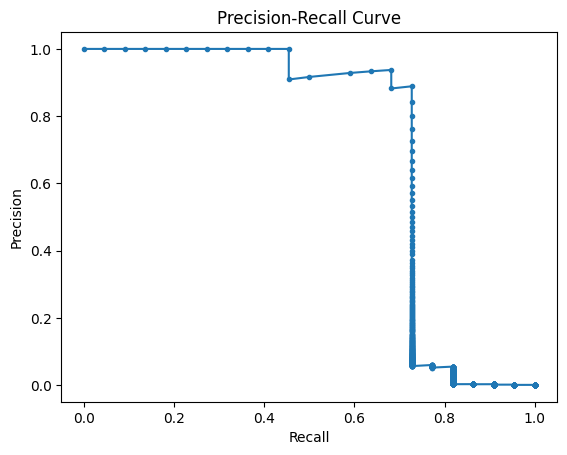

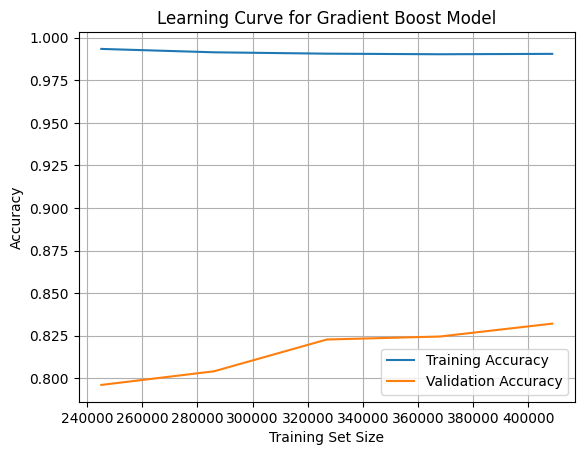



Model: LightGBM
--------
[LightGBM] [Info] Number of positive: 204307, number of negative: 204307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 408614, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 204307, number of negative: 204307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 408614, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 204307, number of negative: 204307
[LightGBM] [Info

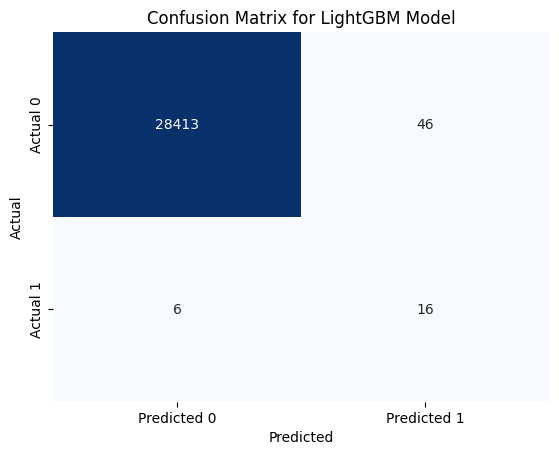

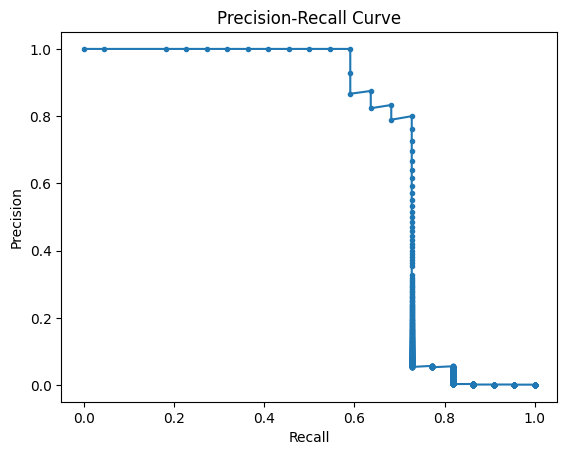

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 40861
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 40861, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

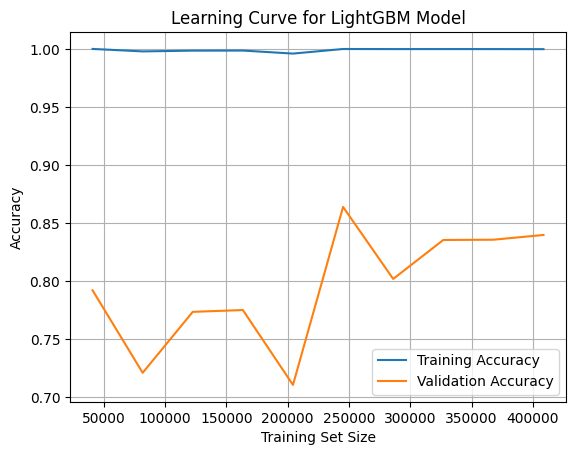

In [28]:
for name, model in models.items():
    
    
    print(f'Model: {name}')
    print('-' * len(name))
   
    
    # Perform cross-validation and print scores
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"CV Scores: {cv_scores}")
    
    
    # Fit the model on training data
    model.fit(x_train, y_train)
    
    
    # Predictions on training and test data
    y_prediction_test = model.predict(x_test)
    y_prediction_train = model.predict(x_train)

    y_prediction_pro = model.predict_proba(x_test)[:, 1]
    
    
    # Print accuracy scores for training and test sets
    print(f'Train Accuracy: {accuracy_score(y_train, y_prediction_train)}')
    print(f'Test Accuracy: {accuracy_score(y_test, y_prediction_test)}')
    
    
    # Print classification report for the test set
    print(f'classification_report:\n{classification_report(y_test, y_prediction_test)}')
    
    
    # Confusion matrix plot
    # conf_matrix = confusion_matrix(y_test, y_prediction_test)
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_prediction_test))
    conf_matrix.columns = ['Predicted 0','Predicted 1']
    conf_matrix = conf_matrix.rename(index={0: 'Actual 0',1:'Actual 1'})
    conf_matrix
    
    sns.heatmap(conf_matrix, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.title(f'Confusion Matrix for {name} Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prediction_pro)
    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    
    # Generate learning curve
    train_sizes, train_scores, validation_scores = learning_curve(model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    
    # Compute mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    
    
    # Plot learning curve
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, validation_scores_mean, label='Validation Accuracy')
    plt.title(f'Learning Curve for {name} Model')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()
    
    
    print('\n')

## Deep Learning

### ANN Algorithm

In [13]:
model = Sequential()

model.add(Dense(units=29, activation='relu', input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=14, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(units=7, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=2, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



lrd = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.75, min_lr=1e-6)
mcp = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss', verbose=1, patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=3000, batch_size=256, validation_split=0.2, callbacks=[lrd, mcp, es])

Epoch 1/3000
1591/1597 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9518
Epoch 1: val_loss improved from inf to 0.08302, saving model to best_model.keras
1597/1597 [==============================] - 7s 3ms/step - loss: 0.1350 - accuracy: 0.9519 - val_loss: 0.0830 - val_accuracy: 0.9680 - lr: 0.0010
Epoch 2/3000
1597/1597 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9829
Epoch 2: val_loss improved from 0.08302 to 0.05048, saving model to best_model.keras
1597/1597 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0505 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 3/3000
1591/1597 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9865
Epoch 3: val_loss improved from 0.05048 to 0.03296, saving model to best_model.keras
1597/1597 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0330 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 4/300

In [14]:
evaluatetion = model.evaluate(x_test, y_test)

891/891 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 0.9986


In [15]:
model_loss = evaluatetion[0]
model_accuracy = evaluatetion[1]

print(f'Model Loss: {model_loss}')
print(f'Model Accuracy: {model_accuracy}')

Model Loss: 0.006012629251927137
Model Accuracy: 0.9986306428909302


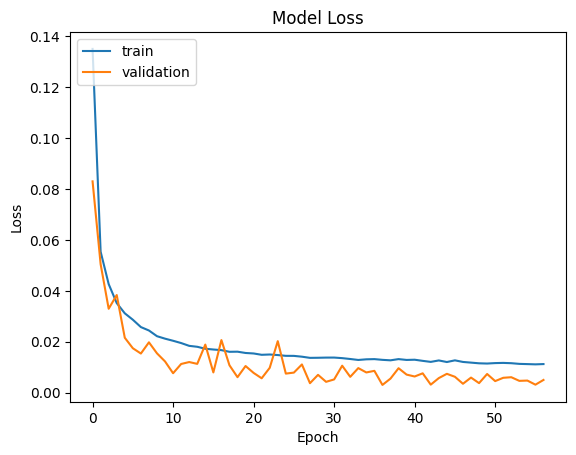

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
prediction = (model.predict(x_test) > 0.5)*1
y_pred = [1 if prediction >= 0.5 else 0 for prediction in prediction]

891/891 [==============================] - 1s 1ms/step


In [29]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
df

,Actual,Predicted
256326,0,0
256327,0,0
256328,0,0
256329,0,0
256330,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


In [30]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28459
           1       0.33      0.73      0.45        22

    accuracy                           1.00     28481
   macro avg       0.66      0.86      0.73     28481
weighted avg       1.00      1.00      1.00     28481



In [31]:
con_matrix = pd.DataFrame(confusion_matrix(y_test,y_prediction))
con_matrix.columns = ['Predicted 0','Predicted 1']
con_matrix = con_matrix.rename(index={0: 'Actual 0',1:'Actual 1'})
con_matrix

,Predicted 0,Predicted 1
Actual 0,28426,33
Actual 1,6,16


In [33]:
con_matrix = confusion_matrix(y_test,y_prediction)

tn = con_matrix[0][0]
fn = con_matrix[1][0]
tp = con_matrix[1][1]
fp = con_matrix[0][1]

accuracy = (tp+tn)/(tp+fp+fn+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'f1 Score: {f1_score}')

Accuracy: 0.9986306660580738
Recall: 0.7272727272727273
Precision: 0.32653061224489793
f1 Score: 0.45070422535211263


In [40]:
from tensorflow.keras.models import load_model
model = load_model('best_model.keras')